In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn
import xgboost as xgb
import math
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from pylift import TransformedOutcome
from pylift.generate_data import dgp
from pylift.eval import UpliftEval
from sklearn.cluster import KMeans
from statistics import mean
import sklearn.metrics
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, multilabel_confusion_matrix, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
%store -r dataset_1 
%store -r dataset_2 
%store -r dataset_3 

In [3]:
dataset_1['dataset'] = 'Dataset 1'
dataset_2['dataset'] = 'Dataset 2'
dataset_3['dataset'] = 'Dataset 3'
all_dataset = pd.concat([dataset_1, dataset_2, dataset_3])

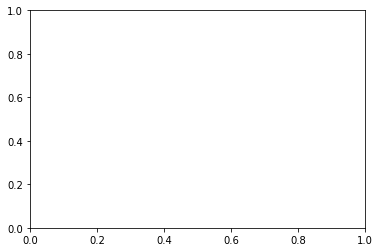

In [5]:
fig, ax = plt.subplots(1,1)
sns.set_style("whitegrid")

In [21]:
dataset_1

,index,id,Stay,promotion_last_5years,target_class,p_stay,stay_score,decile,method,p_target,uplift_score,dataset
0,0.000000,1939,1,0,CR,1.0,0.001153,0.1,CP,NaN,NaN,Dataset 1
1,0.000222,14975,1,0,CR,1.0,0.001153,0.1,CP,NaN,NaN,Dataset 1
2,0.000445,14777,1,0,CR,1.0,0.001192,0.1,CP,NaN,NaN,Dataset 1
3,0.000667,563,1,0,CR,1.0,0.001192,0.1,CP,NaN,NaN,Dataset 1
4,0.000889,12563,1,0,CR,1.0,0.001192,0.1,CP,NaN,NaN,Dataset 1
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.999111,1827,1,0,CR,NaN,NaN,1.0,Uplift,1.0,-1.875644,Dataset 1
4496,0.999333,1676,1,0,CR,NaN,NaN,1.0,Uplift,1.0,-1.895762,Dataset 1
4497,0.999555,1982,1,0,CR,NaN,NaN,1.0,Uplift,1.0,-1.896925,Dataset 1
4498,0.999778,1675,1,0,CR,NaN,NaN,1.0,Uplift,1.0,-1.917124,Dataset 1


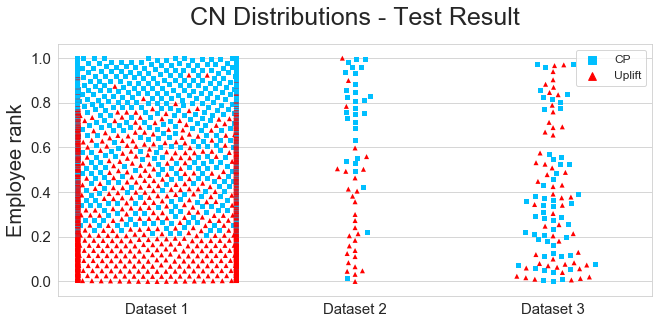

In [6]:
# dummy plots, just to get the Path objects
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
a.remove()
b.remove()

ax = sns.swarmplot(data=all_dataset[all_dataset.target_class=='CN'], x='dataset', y='index', 
              hue='method', palette=['deepskyblue','red'], 
                   order=['Dataset 1', 'Dataset 2', 'Dataset 3'], size=5)

plt.title('CN Distributions - Test Result',fontsize=25, y=1.05)
plt.ylabel('Employee rank',fontsize=20)
plt.xlabel('')
plt.subplots_adjust(right=1.5)
plt.subplots_adjust(top=1)

# plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.tick_params(labelsize=15)

collections = ax.collections
unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
markers = [square_mk, triangle_up_mk]  # this array must be at least as large as the number of unique colors
for collection in collections:
    paths = []
    for current_color in collection.get_facecolors():
        for possible_marker,possible_color in zip(markers, unique_colors):
            if np.array_equal(current_color,possible_color):
                paths.append(possible_marker)
                break
    collection.set_paths(paths)
#update legend
# ax.legend_.remove()
ax.legend(collections[-2:],pd.unique(all_dataset.method))  
plt.legend(fontsize='large')
plt.savefig('CN.pdf', bbox_inches='tight')

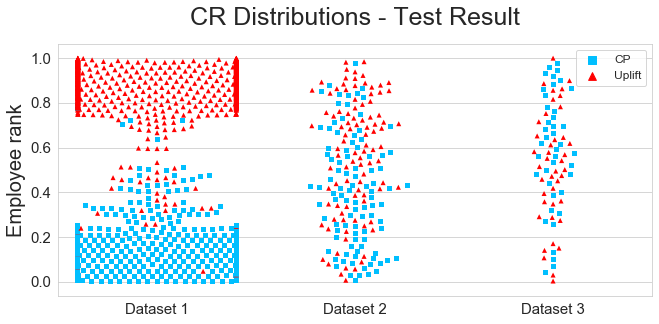

In [7]:
# dummy plots, just to get the Path objects
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
a.remove()
b.remove()

ax = sns.swarmplot(data=all_dataset[all_dataset.target_class=='CR'], x='dataset', y='index', 
              hue='method', palette=['deepskyblue','red'], 
                   order=['Dataset 1', 'Dataset 2', 'Dataset 3'], size=5)

plt.title('CR Distributions - Test Result',fontsize=25, y=1.05)
plt.ylabel('Employee rank',fontsize=20)
plt.xlabel('')
plt.subplots_adjust(right=1.5)
plt.subplots_adjust(top=1)

# plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.tick_params(labelsize=15)

collections = ax.collections
unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
markers = [square_mk, triangle_up_mk] # this array must be at least as large as the number of unique colors
for collection in collections:
    paths = []
    for current_color in collection.get_facecolors():
        for possible_marker,possible_color in zip(markers, unique_colors):
            if np.array_equal(current_color,possible_color):
                paths.append(possible_marker)
                break
    collection.set_paths(paths)
#update legend
# ax.legend_.remove()
ax.legend(collections[-2:],pd.unique(all_dataset.method))  
plt.legend(fontsize='large')
plt.savefig('CR.pdf', bbox_inches='tight')

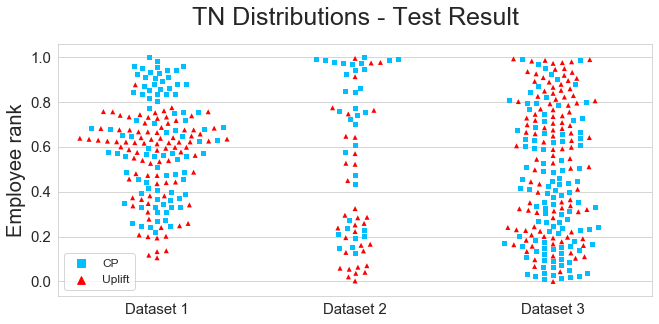

In [8]:
# dummy plots, just to get the Path objects
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
a.remove()
b.remove()

ax = sns.swarmplot(data=all_dataset[all_dataset.target_class=='TN'], x='dataset', y='index', 
              hue='method', palette=['deepskyblue','red'], 
                   order=['Dataset 1', 'Dataset 2', 'Dataset 3'], size=5)

plt.title('TN Distributions - Test Result',fontsize=25, y=1.05)
plt.ylabel('Employee rank',fontsize=20)
plt.xlabel('')
plt.subplots_adjust(right=1.5)
plt.subplots_adjust(top=1)

# plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.tick_params(labelsize=15)

collections = ax.collections
unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
markers = [square_mk, triangle_up_mk]  # this array must be at least as large as the number of unique colors
for collection in collections:
    paths = []
    for current_color in collection.get_facecolors():
        for possible_marker,possible_color in zip(markers, unique_colors):
            if np.array_equal(current_color,possible_color):
                paths.append(possible_marker)
                break
    collection.set_paths(paths)
#update legend
# ax.legend_.remove()
ax.legend(collections[-2:],pd.unique(all_dataset.method))  
plt.legend(fontsize='large')
plt.savefig('TN.pdf', bbox_inches='tight')

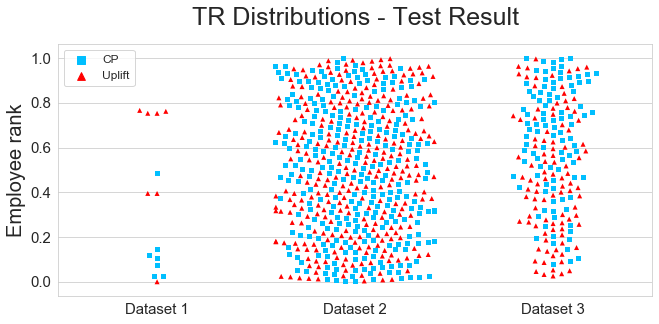

In [9]:
# dummy plots, just to get the Path objects
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
a.remove()
b.remove()

ax = sns.swarmplot(data=all_dataset[all_dataset.target_class=='TR'], x='dataset', y='index', 
              hue='method', palette=['deepskyblue','red'], 
                   order=['Dataset 1', 'Dataset 2', 'Dataset 3'], size=5)

plt.title('TR Distributions - Test Result',fontsize=25, y=1.05)
plt.ylabel('Employee rank',fontsize=20)
plt.xlabel('')
plt.subplots_adjust(right=1.5)
plt.subplots_adjust(top=1)

# plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.tick_params(labelsize=15)

collections = ax.collections
unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
markers = [square_mk, triangle_up_mk]  # this array must be at least as large as the number of unique colors
for collection in collections:
    paths = []
    for current_color in collection.get_facecolors():
        for possible_marker,possible_color in zip(markers, unique_colors):
            if np.array_equal(current_color,possible_color):
                paths.append(possible_marker)
                break
    collection.set_paths(paths)
#update legend
# ax.legend_.remove()
ax.legend(collections[-2:],pd.unique(all_dataset.method))  
plt.legend(fontsize='large')
plt.savefig('TR.pdf', bbox_inches='tight')

In [10]:
%store -r result_emp_1
%store -r result_emp_2
%store -r result_emp_3

In [11]:
def add_random(df:pd.DataFrame):
    deciles = np.arange(0,1.1,0.1)
    random = np.linspace(df.iloc[0,-2], df.iloc[-1,-2], 11)
    random_df = pd.DataFrame({"n":deciles, 
                             df.columns[-2]:random,
                            "method":"Random"})
    df = df.append(random_df)
    df = df.sort_values(by=['n'])
    return df

In [12]:
def plot_emp(df:pd.DataFrame):
    order = ['Uplift','CP','Random']
    ax = sns.lineplot(x='n', y='emp', hue='method', data=df, style='method',
                      palette=['red','deepskyblue','grey'], style_order=order, hue_order = order)
    plt.xlabel('Proportion targeted (ascending)',fontsize=15)
    plt.ylabel('Maximum Profit',fontsize=15)
    #plot size
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    #ax tick size
    ax.tick_params(labelsize=15)
    #legend size
    plt.legend(fontsize=12)
    return ax

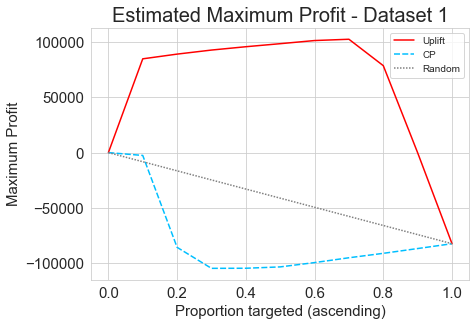

In [13]:
result_emp_1 = add_random(result_emp_1)
ax = plot_emp(result_emp_1)
plt.title('Estimated Maximum Profit - Dataset 1',fontsize=20)
#removing legend's title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper right')
plt.savefig('emp1.pdf', bbox_inches='tight')

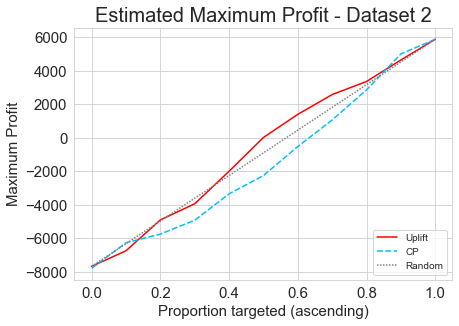

In [14]:
result_emp_2 = add_random(result_emp_2)
ax = plot_emp(result_emp_2)
plt.title('Estimated Maximum Profit - Dataset 2',fontsize=20)
#removing legend's title
plt.legend(loc='lower right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='lower right')
plt.savefig('emp2.pdf', bbox_inches='tight')

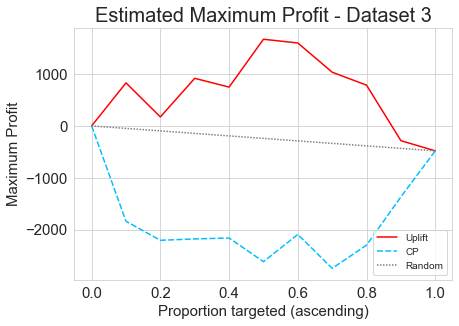

In [15]:
result_emp_3 = add_random(result_emp_3)
ax = plot_emp(result_emp_3)
plt.title('Estimated Maximum Profit - Dataset 3',fontsize=20)
#removing legend's title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='lower right')
plt.savefig('emp3.pdf', bbox_inches='tight')

In [16]:
%store -r result_QINI_1
%store -r result_QINI_2
%store -r result_QINI_3

In [17]:
def plot_QINI(df:pd.DataFrame):
    order = ['Uplift','CP','Random']
    ax = sns.lineplot(x='n', y=df.columns[-2], hue='method', data=df, style='method',
                      palette=['red','deepskyblue','grey'], style_order=order, hue_order = order)
    plt.xlabel('Proportion targeted',fontsize=15)
    plt.ylabel('Uplift',fontsize=15)
    #plot size
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    #ax tick size
    ax.tick_params(labelsize=15)
    #legend size
    plt.legend(fontsize=12)
    return ax

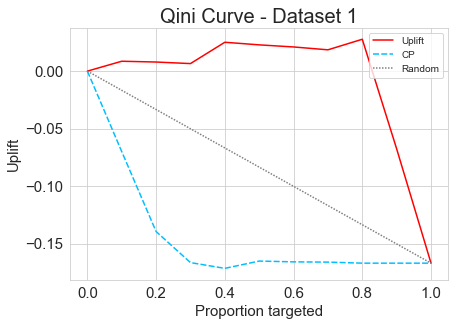

In [18]:
result_QINI_1 = add_random(result_QINI_1)
ax = plot_QINI(result_QINI_1)
plt.title('Qini Curve - Dataset 1',fontsize=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper right')
plt.savefig('QINI1.pdf', bbox_inches='tight')

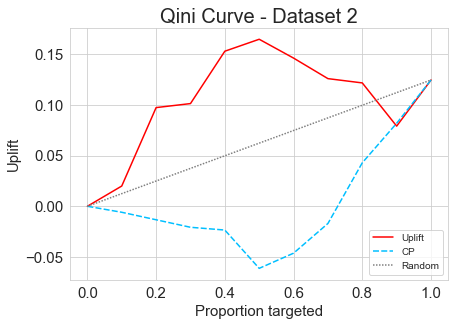

In [19]:
result_QINI_2 = add_random(result_QINI_2)
ax = plot_QINI(result_QINI_2)
plt.title('Qini Curve - Dataset 2',fontsize=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='lower right')
plt.savefig('QINI2.pdf', bbox_inches='tight')

In [20]:
result_QINI_3

,n,uplift,method
0,0.0,0.000000,CP
0,0.0,0.000000,Uplift
1,0.1,-0.011568,CP
1,0.1,0.022413,Uplift
2,0.2,-0.008573,CP
2,0.2,0.018694,Uplift
3,0.3,-0.000723,CP
3,0.3,0.054741,Uplift
4,0.4,-0.003512,CP
4,0.4,0.051023,Uplift


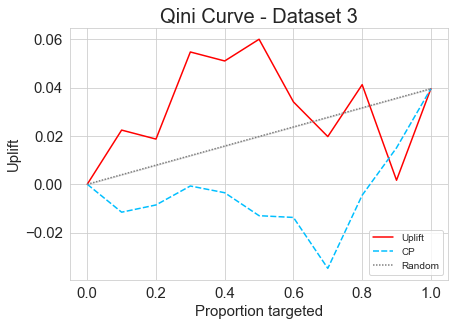

In [88]:
result_QINI_3 = add_random(result_QINI_3)
ax = plot_QINI(result_QINI_3)
plt.title('Qini Curve - Dataset 3',fontsize=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='lower right')
plt.savefig('QINI3.pdf', bbox_inches='tight')